In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Charger les fichiers d'entraînement et de test
train_data = pd.read_csv("/content/540-ws-training_processed.csv")
test_data = pd.read_csv("/content/540-ws-testing_processed.csv")
gen_data = pd.read_csv("/content/544-ws-testing_processed.csv")


# Afficher un aperçu des données
print("Données d'entraînement :")
print(train_data.head())
print("\nDonnées de test :")
print(test_data.head())
print("\nDonnées de généralisation :")
print(gen_data.head())




Données d'entraînement :
   5minute_intervals_timestamp  missing_cbg   cbg  finger  basal  hr  \
0                 6.035755e+06          0.0  76.0    80.0    NaN NaN   
1                 6.035756e+06          0.0  72.0     NaN    NaN NaN   
2                 6.035757e+06          0.0  68.0     NaN    NaN NaN   
3                 6.035758e+06          0.0  65.0     NaN    NaN NaN   
4                 6.035759e+06          0.0  63.0     NaN    NaN NaN   

        gsr  carbInput  bolus  
0  0.337214        NaN    NaN  
1  0.317671        NaN    NaN  
2  0.342821        NaN    NaN  
3  0.359941        NaN    NaN  
4  0.365833        NaN    NaN  

Données de test :
   5minute_intervals_timestamp  missing_cbg    cbg  finger  basal  hr  gsr  \
0                 6.048864e+06          0.0  254.0     NaN    1.6 NaN  NaN   
1                 6.048865e+06          0.0  250.0     NaN    1.6 NaN  NaN   
2                 6.048866e+06          0.0  249.0     NaN    1.6 NaN  NaN   
3                 6

In [ ]:
train_data= train_data[['5minute_intervals_timestamp','cbg']]
test_data= test_data[['5minute_intervals_timestamp','cbg']]
gen_data= gen_data[['5minute_intervals_timestamp','cbg']]
print("Données d'entraînement :")
print(train_data.head())
print("\nDonnées de test :")
print(test_data.head())
print("\nDonnées de généralisation :")
print(gen_data.head())

Données d'entraînement :
   5minute_intervals_timestamp   cbg
0                 6.035755e+06  76.0
1                 6.035756e+06  72.0
2                 6.035757e+06  68.0
3                 6.035758e+06  65.0
4                 6.035759e+06  63.0

Données de test :
   5minute_intervals_timestamp    cbg
0                 6.048864e+06  254.0
1                 6.048865e+06  250.0
2                 6.048866e+06  249.0
3                 6.048867e+06  247.0
4                 6.048868e+06  242.0

Données de généralisation :
   5minute_intervals_timestamp    cbg
0                 6.045984e+06  161.0
1                 6.045985e+06  155.0
2                 6.045986e+06  150.0
3                 6.045987e+06  147.0
4                 6.045988e+06  144.0


In [ ]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())
print(gen_data.isnull().sum())


5minute_intervals_timestamp       0
cbg                            1163
dtype: int64
5minute_intervals_timestamp      0
cbg                            169
dtype: int64
5minute_intervals_timestamp      0
cbg                            420
dtype: int64


In [ ]:
train_data = train_data.dropna()
test_data = test_data.dropna()
gen_data = gen_data.dropna()


In [ ]:
scaler = MinMaxScaler()

# Normaliser les niveaux de glucose dans les deux ensembles
train_data["cbg"] = scaler.fit_transform(train_data[["cbg"]])
test_data["cbg"] = scaler.transform(test_data[["cbg"]])
gen_data["cbg"] = scaler.transform(gen_data[["cbg"]])

In [ ]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])  # Séquences d'entrée
        y.append(data[i + sequence_length])   # Valeur cible
    return np.array(X), np.array(y)

sequence_length = 10

# Créer les séquences pour l'entraînement
X_train, y_train = create_sequences(train_data["cbg"].values, sequence_length)

# Créer les séquences pour le test
X_test, y_test = create_sequences(test_data["cbg"].values, sequence_length)

# Créer les séquences pour la généralisation
X_gen, y_gen = create_sequences(gen_data["cbg"].values, sequence_length)


In [ ]:
# Reshaper les données
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_gen = X_gen.reshape((X_gen.shape[0], X_gen.shape[1], 1))

print(f"Forme des données d'entraînement : {X_train.shape}")
print(f"Forme des données de test : {X_test.shape}")
print(f"Forme des données de généralisation : {X_gen.shape}")


Forme des données d'entraînement : (11936, 10, 1)
Forme des données de test : (2886, 10, 1)
Forme des données de généralisation : (2706, 10, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input

# Créer le modèle
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Utiliser Input comme première couche
    SimpleRNN(10, activation='relu', return_sequences=False, return_state=False),  # Activation modifiée en 'relu'
    Dense(1)  # Une seule sortie : prédiction du niveau de glucose
])

# Compiler le modèle
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Afficher un résumé du modèle
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),  # Évaluez sur les données de test pendant l'entraînement
    epochs=20,  # Nombre d'itérations sur les données
    batch_size=32,  # Taille des lots
    verbose=1
)


Epoch 1/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0770 - mae: 0.1873 - val_loss: 5.2795e-04 - val_mae: 0.0158
Epoch 2/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.3944e-04 - mae: 0.0125 - val_loss: 2.7273e-04 - val_mae: 0.0106
Epoch 3/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.6137e-04 - mae: 0.0101 - val_loss: 2.6424e-04 - val_mae: 0.0104
Epoch 4/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4500e-04 - mae: 0.0099 - val_loss: 2.5857e-04 - val_mae: 0.0101
Epoch 5/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.2563e-04 - mae: 0.0100 - val_loss: 2.5866e-04 - val_mae: 0.0104
Epoch 6/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.1552e-04 - mae: 0.0097 - val_loss: 2.4761e-04 - val_mae: 0.0098
Epoch 7/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.0917e-04 - mae: 0.0092 - val_loss: 2.4400e-04 - val_mae: 0.0096
Epoch 8/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4801e-04 - mae: 0.0095 - val_loss: 2.4549e-04 - val_mae: 0.0

In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error sur les données de test : {mae}")

loss1, mae1 = model.evaluate(X_gen, y_gen)
print(f"Mean Absolute Error sur les données de généralisation : {mae1}")


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9283e-04 - mae: 0.0091
Mean Absolute Error sur les données de test : 0.009584221057593822
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3956e-04 - mae: 0.0081
Mean Absolute Error sur les données de généralisation : 0.008440211415290833


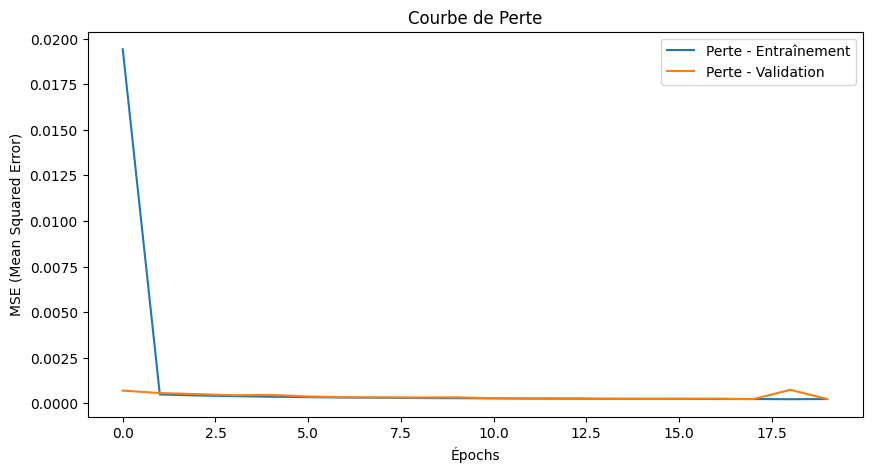

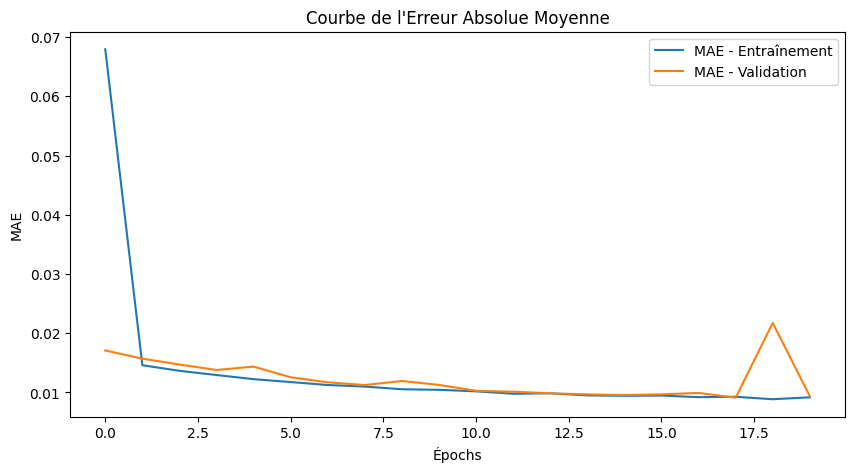

91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


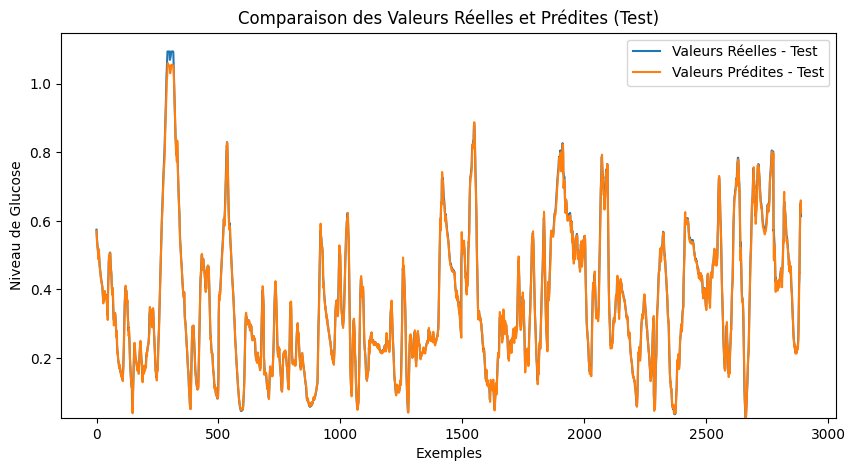

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


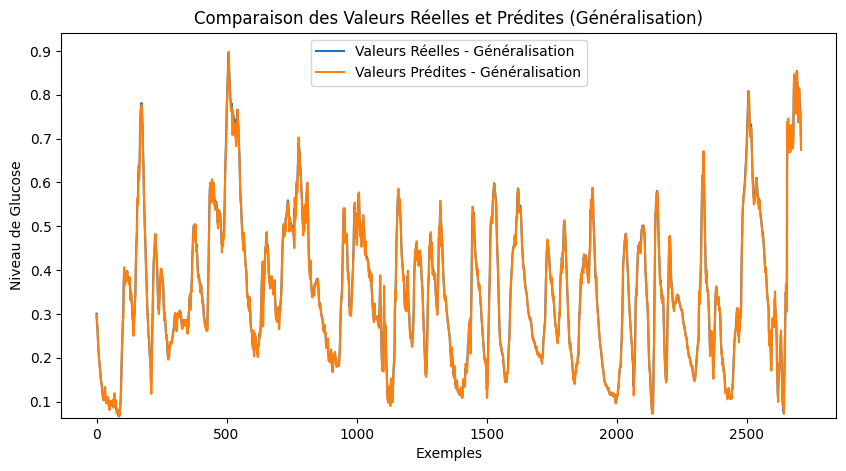

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Tracer les courbes de perte pendant l'entraînement
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Perte - Entraînement')
plt.plot(history.history['val_loss'], label='Perte - Validation')
plt.title('Courbe de Perte')
plt.xlabel('Épochs')
plt.ylabel('MSE (Mean Squared Error)')
plt.legend()
plt.show()

# Tracer les courbes MAE (Mean Absolute Error) pendant l'entraînement
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='MAE - Entraînement')
plt.plot(history.history['val_mae'], label='MAE - Validation')
plt.title('Courbe de l\'Erreur Absolue Moyenne')
plt.xlabel('Épochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Comparer les valeurs réelles et prédites sur les données de test avec une échelle ajustée
y_test_pred = model.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Valeurs Réelles - Test')
plt.plot(y_test_pred, label='Valeurs Prédites - Test')
plt.ylim(min(y_test) * 0.95, max(y_test) * 1.05)  # Ajustement de l'échelle Y pour zoomer
plt.title('Comparaison des Valeurs Réelles et Prédites (Test)')
plt.xlabel('Exemples')
plt.ylabel('Niveau de Glucose')
plt.legend()
plt.show()

# Comparer les valeurs réelles et prédites sur les données de généralisation avec une échelle ajustée
y_gen_pred = model.predict(X_gen)

plt.figure(figsize=(10, 5))
plt.plot(y_gen, label='Valeurs Réelles - Généralisation')
plt.plot(y_gen_pred, label='Valeurs Prédites - Généralisation')
plt.ylim(min(y_gen) * 0.95, max(y_gen) * 1.05)  # Ajustement de l'échelle Y pour zoomer
plt.title('Comparaison des Valeurs Réelles et Prédites (Généralisation)')
plt.xlabel('Exemples')
plt.ylabel('Niveau de Glucose')
plt.legend()
plt.show()


In [ ]:
# Sauvegarder les poids du modèle
model.save_weights('/content/rnn_weights.weights.h5')
print("Poids du modèle sauvegardés.")

Poids du modèle sauvegardés.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_future_predictions(model, X_test, y_test, steps=6, num_samples=40):
    """
    Teste le modèle sur un sous-ensemble de num_samples séquences et prédit la glycémie sur 30 minutes.

    :param model: Le modèle RNN entraîné.
    :param X_test: Séquences de test (shape: nb_samples, sequence_length, 1).
    :param y_test: Vraies valeurs de test correspondant aux séquences.
    :param steps: Nombre d'étapes de prédiction (6 * 5 min = 30 min).
    :param num_samples: Nombre d'échantillons à tester (par défaut : 20).
    :return: Liste des prédictions et métriques d'évaluation.
    """
    # Sélectionner aléatoirement 20 indices dans X_test
    indices = np.random.choice(len(X_test), num_samples, replace=False)

    all_predictions = []
    true_values = []  # Stocke les vraies valeurs à 30 min

    for i in indices:
        current_sequence = X_test[i].reshape(1, sequence_length, 1)  # Mise en forme pour l'entrée du modèle
        future_predictions = []  # Stocke les 6 prochaines prédictions

        for _ in range(steps):
            next_glucose = model.predict(current_sequence, verbose=0)[0, 0]  # Prédiction unique
            future_predictions.append(next_glucose)

            # Mise à jour de la séquence d'entrée
            current_sequence = np.roll(current_sequence, -1, axis=1)  # Décale vers la gauche
            current_sequence[0, -1, 0] = next_glucose  # Ajoute la nouvelle valeur

        all_predictions.append(future_predictions[-1])  # Dernière prédiction = 30 min
        true_values.append(y_test[i + steps - 1])  # Vraie valeur après 30 min

    # Convertir en tableaux numpy
    all_predictions = np.array(all_predictions)
    true_values = np.array(true_values)

    # Calculer les métriques d'évaluation
    mae = mean_absolute_error(true_values, all_predictions)
    mse = mean_squared_error(true_values, all_predictions)

    return all_predictions, true_values, mae, mse


In [ ]:
# Exécuter l’évaluation sur 20 séquences de test
predictions_30min, true_30min, mae, mse = evaluate_future_predictions(model, X_test, y_test)

# Afficher les résultats
print(f"Mean Absolute Error (MAE) après 30 minutes : {mae:.4f}")
print(f"Mean Squared Error (MSE) après 30 minutes : {mse:.4f}")

# Exemple d'affichage de 5 prédictions comparées aux vraies valeurs
for i in range(5):
    print(f"Vraie valeur après 30 min : {true_30min[i]:.2f} | Prédiction : {predictions_30min[i]:.2f}")


Mean Absolute Error (MAE) après 30 minutes : 0.0588
Mean Squared Error (MSE) après 30 minutes : 0.0066
Vraie valeur après 30 min : 1.09 | Prédiction : 0.89
Vraie valeur après 30 min : 0.62 | Prédiction : 0.63
Vraie valeur après 30 min : 0.23 | Prédiction : 0.16
Vraie valeur après 30 min : 0.11 | Prédiction : 0.13
Vraie valeur après 30 min : 0.38 | Prédiction : 0.34


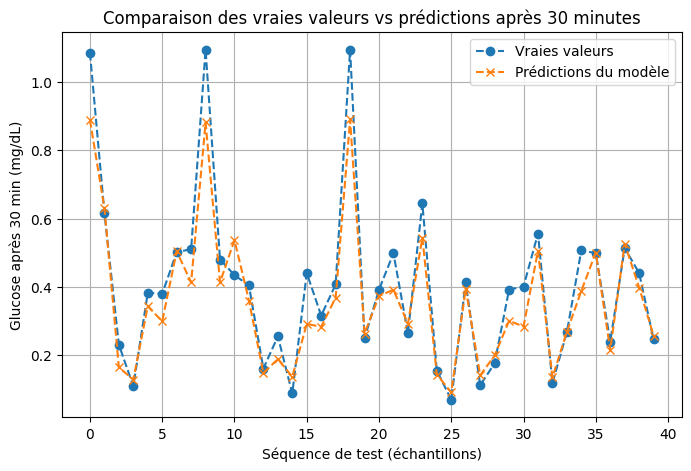

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(true_values, predicted_values):
    """
    Affiche un graphique comparant les vraies valeurs et les prédictions du modèle après 30 min.

    :param true_values: Vraies valeurs de glucose après 30 min.
    :param predicted_values: Prédictions du modèle après 30 min.
    """
    plt.figure(figsize=(8,5))

    # Tracer les vraies valeurs et les prédictions
    plt.plot(true_values, label="Vraies valeurs", marker='o', linestyle='dashed')
    plt.plot(predicted_values, label="Prédictions du modèle", marker='x', linestyle='dashed')

    # Ajouter des labels et un titre
    plt.xlabel("Séquence de test (échantillons)")
    plt.ylabel("Glucose après 30 min (mg/dL)")
    plt.title("Comparaison des vraies valeurs vs prédictions après 30 minutes")
    plt.legend()
    plt.grid(True)

    # Afficher le graphique
    plt.show()

# Afficher les résultats
plot_predictions(true_30min, predictions_30min)


In [ ]:
!pip install tenseal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 29.7 MB/s eta 0:00:00


In [ ]:
import tenseal as ts
import numpy as np
import tensorflow as tf

def relu_approximation_homomorphic(encrypted_x):
    """
    Approximation homomorphe de ReLU(x)
    """
    # Utiliser une approximation soft ReLU
    zero = encrypted_x.mul(0)
    mask = encrypted_x.sub(zero)  # Crée un masque pour les valeurs positives
    result = mask
    return result

def create_context():
    poly_mod_degree = 32768
    coeff_mod_bit_sizes = [40, 22, 22, 40]
    context = ts.context(ts.SCHEME_TYPE.CKKS, poly_mod_degree, coeff_mod_bit_sizes)
    context.global_scale = 2**14
    context.generate_galois_keys()
    return context

def load_model_parameters():
    # Utiliser Input layer pour éviter l'avertissement
    inputs = tf.keras.Input(shape=(10, 1))
    x = tf.keras.layers.SimpleRNN(10, activation='relu')(inputs)
    outputs = tf.keras.layers.Dense(1)(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Charger les poids sauvegardés
    model.load_weights("/content/rnn_weights.weights.h5")

    # Extraire les poids
    rnn_kernel, rnn_recurrent_kernel, rnn_bias = model.layers[1].get_weights()
    dense_weights, dense_bias = model.layers[2].get_weights()

    return rnn_kernel, rnn_recurrent_kernel, rnn_bias, dense_weights, dense_bias

def normalize_sequence(sequence):
    sequence = np.array(sequence, dtype=np.float32)
    min_val = sequence.min()
    max_val = sequence.max()
    normalized_sequence = (sequence - min_val) / (max_val - min_val)
    return normalized_sequence, min_val, max_val

def inference_homomorphic(context, rnn_kernel, rnn_recurrent_kernel, rnn_bias, dense_weights, dense_bias, sequence):
    h_t = ts.ckks_vector(context, np.zeros(10))

    for t in range(10):
        x_t = ts.ckks_vector(context, [sequence[t]])

        # Calcul homomorphe : z_t = W_h * x_t + U_h * h_t + b_h
        z_t = x_t.matmul(rnn_kernel)
        z_t = z_t.add(h_t.matmul(rnn_recurrent_kernel))
        z_t = z_t.add(rnn_bias)

        # Approximation de ReLU(z_t) pour obtenir h_t
        h_t = relu_approximation_homomorphic(z_t)

    # Calcul de la sortie finale : y = Dense(h_t)
    y_t = h_t.matmul(dense_weights).add(dense_bias)

    return y_t

def test_precision():
    # Charger les paramètres du modèle
    rnn_kernel, rnn_recurrent_kernel, rnn_bias, dense_weights, dense_bias = load_model_parameters()

    # Séquence d'entrée
    raw_sequence = [254, 250, 249, 247, 242, 235, 229, 224, 220, 217]

    # Normaliser la séquence
    normalized_sequence, min_val, max_val = normalize_sequence(raw_sequence)

    # Inférence en clair
    def inference_plain(rnn_kernel, rnn_recurrent_kernel, rnn_bias, dense_weights, dense_bias, sequence):
        h_t = np.zeros(10, dtype=np.float32)
        for t in range(10):
            x_t = np.array([sequence[t]], dtype=np.float32)
            z_t = np.dot(rnn_kernel.T, x_t) + np.dot(rnn_recurrent_kernel.T, h_t) + rnn_bias
            h_t = np.maximum(z_t, 0)  # Fonction ReLU réelle
        y_t = np.dot(h_t, dense_weights) + dense_bias
        return y_t

    # Prédiction en clair
    plain_output = inference_plain(rnn_kernel, rnn_recurrent_kernel, rnn_bias, dense_weights, dense_bias, normalized_sequence)
    plain_output_denormalized = plain_output * (max_val - min_val) + min_val

    # Inférence homomorphe
    context = create_context()
    encrypted_output = inference_homomorphic(context, rnn_kernel, rnn_recurrent_kernel, rnn_bias, dense_weights, dense_bias, normalized_sequence)
    encrypted_output_denormalized = np.array(encrypted_output.decrypt()) * (max_val - min_val) + min_val

    # Calcul de l'erreur absolue
    error = np.abs(plain_output_denormalized - encrypted_output_denormalized)

    # Calcul de la MAE (Mean Absolute Error)
    mae = np.mean(np.abs(plain_output_denormalized - encrypted_output_denormalized))

    print(f"Prédiction en clair : {plain_output_denormalized}")
    print(f"Prédiction homomorphe : {encrypted_output_denormalized}")
    print(f"Erreur absolue : {error}")
    print(f"Erreur Absolue Moyenne (MAE) : {mae}")

# Exécuter le test
test_precision()


In [ ]:
import numpy as np
import tenseal as ts
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Fonction pour créer le contexte de chiffrement
def create_context():
    poly_mod_degree = 32768
    coeff_mod_bit_sizes = [40, 22, 22, 40]
    context = ts.context(ts.SCHEME_TYPE.CKKS, poly_mod_degree, coeff_mod_bit_sizes)
    context.global_scale = 2**14
    context.generate_galois_keys()
    print("Contexte de chiffrement créé.")
    return context

# Fonction pour charger les paramètres du modèle
def load_model_parameters():
    inputs = tf.keras.Input(shape=(10, 1))
    x = tf.keras.layers.SimpleRNN(10, activation='relu')(inputs)
    outputs = tf.keras.layers.Dense(1)(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Charger les poids sauvegardés
    model.load_weights("/content/rnn_weights.weights.h5")

    # Extraire les poids
    rnn_kernel, rnn_recurrent_kernel, rnn_bias = model.layers[1].get_weights()
    dense_weights, dense_bias = model.layers[2].get_weights()

    print("Paramètres du modèle chargés.")
    return rnn_kernel, rnn_recurrent_kernel, rnn_bias, dense_weights, dense_bias

# Fonction de normalisation de la séquence
def normalize_sequence(sequence):
    sequence = np.array(sequence, dtype=np.float32)
    min_val = sequence.min()
    max_val = sequence.max()
    normalized_sequence = (sequence - min_val) / (max_val - min_val)
    print(f"Séquence normalisée : {normalized_sequence}")
    return normalized_sequence, min_val, max_val

# Fonction d'inférence classique
def inference_plain(rnn_kernel, rnn_recurrent_kernel, rnn_bias, dense_weights, dense_bias, sequence):
    h_t = np.zeros(10, dtype=np.float32)
    for t in range(10):
        x_t = np.array([sequence[t]], dtype=np.float32)
        z_t = np.dot(rnn_kernel.T, x_t) + np.dot(rnn_recurrent_kernel.T, h_t) + rnn_bias
        h_t = np.maximum(z_t, 0)  # Fonction ReLU réelle
    y_t = np.dot(h_t, dense_weights) + dense_bias
    return y_t

# Fonction d'inférence homomorphe
def relu_approximation_homomorphic(encrypted_x):
    zero = encrypted_x.mul(0)
    mask = encrypted_x.sub(zero)  # Crée un masque pour les valeurs positives
    result = mask
    return result

def inference_homomorphic(context, rnn_kernel, rnn_recurrent_kernel, rnn_bias, dense_weights, dense_bias, sequence):
    h_t = ts.ckks_vector(context, np.zeros(10))

    for t in range(10):
        x_t = ts.ckks_vector(context, [sequence[t]])

        # Calcul homomorphe : z_t = W_h * x_t + U_h * h_t + b_h
        z_t = x_t.matmul(rnn_kernel)
        z_t = z_t.add(h_t.matmul(rnn_recurrent_kernel))
        z_t = z_t.add(rnn_bias)

        # Approximation de ReLU(z_t) pour obtenir h_t
        h_t = relu_approximation_homomorphic(z_t)

    # Calcul de la sortie finale : y = Dense(h_t)
    y_t = h_t.matmul(dense_weights).add(dense_bias)
    return y_t

# Fonction pour afficher un seul diagramme
def plot_results_single(raw_sequences, plain_outputs, encrypted_outputs, errors):
    num_sequences = len(raw_sequences)
    sequence_indices = range(num_sequences)  # Indices des séquences

    # Convertir les données en scalaires si elles sont des arrays
    plain_outputs = np.array(plain_outputs).flatten()
    encrypted_outputs = np.array(encrypted_outputs).flatten()
    errors = np.array(errors).flatten()

    # Configurer la figure
    plt.figure(figsize=(12, 8))

    # Tracer les prédictions en clair
    plt.plot(sequence_indices, plain_outputs, 'go-', label="Prédictions en clair (dénormalisées)")

    # Tracer les prédictions homomorphes
    plt.plot(sequence_indices, encrypted_outputs, 'ro-', label="Prédictions homomorphes (dénormalisées)")

    # Tracer les erreurs absolues
    plt.bar(sequence_indices, errors, alpha=0.5, color="orange", label="Erreur absolue")

    # Ajouter des informations de personnalisation
    plt.title("Prédictions et erreurs pour toutes les séquences", fontsize=16)
    plt.xlabel("Index des séquences", fontsize=14)
    plt.ylabel("Valeurs / Erreurs", fontsize=14)
    plt.xticks(sequence_indices, [f"Seq {i+1}" for i in sequence_indices], fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Afficher le graphique
    plt.tight_layout()
    plt.show()

# Modifier la fonction de test pour inclure les sorties et erreurs
def test_precision_multiple_sequences_with_single_plot():
    # Charger les paramètres du modèle
    rnn_kernel, rnn_recurrent_kernel, rnn_bias, dense_weights, dense_bias = load_model_parameters()

    # Ensemble de séquences d'entrée
    raw_sequences = [
        [254, 250, 249, 247, 242, 235, 229, 224, 220, 217],
        [215, 212, 209, 205, 208, 210, 206, 201, 198, 195],
        [192, 191, 188, 185, 184, 182, 180, 179, 177, 176],
        [174, 170, 166, 162, 163, 163, 162, 163, 167, 169],
        [168, 167, 166, 165, 165, 164, 166, 164, 161, 158],
        [152, 147, 160, 169, 179, 184, 198, 200, 203, 204],
        [206, 207, 207, 200, 196, 193, 190, 186, 178, 174],
        [170, 169, 173, 166, 159, 150, 143, 142, 142, 147],
        [148, 149, 149, 146, 144, 141, 133, 130, 132, 127],
        [119, 115, 113, 110, 106, 104, 103, 101, 98, 97]

    ]

    # Initialiser les erreurs
    plain_outputs = []
    encrypted_outputs = []
    error_list = []

    # Créer le contexte de chiffrement
    context = create_context()

    for raw_sequence in raw_sequences:
        print(f"\nTraitement de la séquence : {raw_sequence}")

        # Normaliser la séquence
        normalized_sequence, min_val, max_val = normalize_sequence(raw_sequence)

        # Prédiction en clair
        plain_output = inference_plain(rnn_kernel, rnn_recurrent_kernel, rnn_bias, dense_weights, dense_bias, normalized_sequence)
        plain_output_denormalized = plain_output.flatten()[0] * (max_val - min_val) + min_val
        print(f"Denormalized plaintext prediction : {plain_output_denormalized}")

        # Prédiction homomorphe
        encrypted_output = inference_homomorphic(context, rnn_kernel, rnn_recurrent_kernel, rnn_bias, dense_weights, dense_bias, normalized_sequence)
        encrypted_output_denormalized = np.array(encrypted_output.decrypt())[0] * (max_val - min_val) + min_val
        print(f"Denormalized homomorphic prediction : {encrypted_output_denormalized}")

        # Calculer l'erreur absolue
        error = np.abs(plain_output_denormalized - encrypted_output_denormalized)
        print(f"Absolute error : {error}")

        # Ajouter aux résultats
        plain_outputs.append(plain_output_denormalized)
        encrypted_outputs.append(encrypted_output_denormalized)
        error_list.append(error)

    # Calculer les métriques MAE et MSE
    mae = mean_absolute_error(plain_outputs, encrypted_outputs)
    mse = mean_squared_error(plain_outputs, encrypted_outputs)

    print(f"\n✅ Mean Absolute Error (MAE): {mae:.4f}")
    print(f"✅ Mean Square Error (MSE) : {mse:.4f}")

    # Afficher les résultats globaux
    plot_results_single(raw_sequences, plain_outputs, encrypted_outputs, error_list)

ModuleNotFoundError: No module named 'tenseal'

Paramètres du modèle chargés.
Contexte de chiffrement créé.

Traitement de la séquence : [254, 250, 249, 247, 242, 235, 229, 224, 220, 217]
Séquence normalisée : [1.         0.8918919  0.8648649  0.8108108  0.6756757  0.4864865
 0.3243243  0.1891892  0.08108108 0.        ]
Prédiction en clair dénormalisée : 214.89202880859375
Prédiction homomorphe dénormalisée : 222.84485458290592
Erreur absolue : 7.952825774312174

Traitement de la séquence : [215, 212, 209, 205, 208, 210, 206, 201, 198, 195]
Séquence normalisée : [1.   0.85 0.7  0.5  0.65 0.75 0.55 0.3  0.15 0.  ]
Prédiction en clair dénormalisée : 193.24301147460938
Prédiction homomorphe dénormalisée : 183.58992171624317
Erreur absolue : 9.653089758366207

Traitement de la séquence : [192, 191, 188, 185, 184, 182, 180, 179, 177, 176]
Séquence normalisée : [1.     0.9375 0.75   0.5625 0.5    0.375  0.25   0.1875 0.0625 0.    ]
Prédiction en clair dénormalisée : 175.1226043701172
Prédiction homomorphe dénormalisée : 183.6158788339202


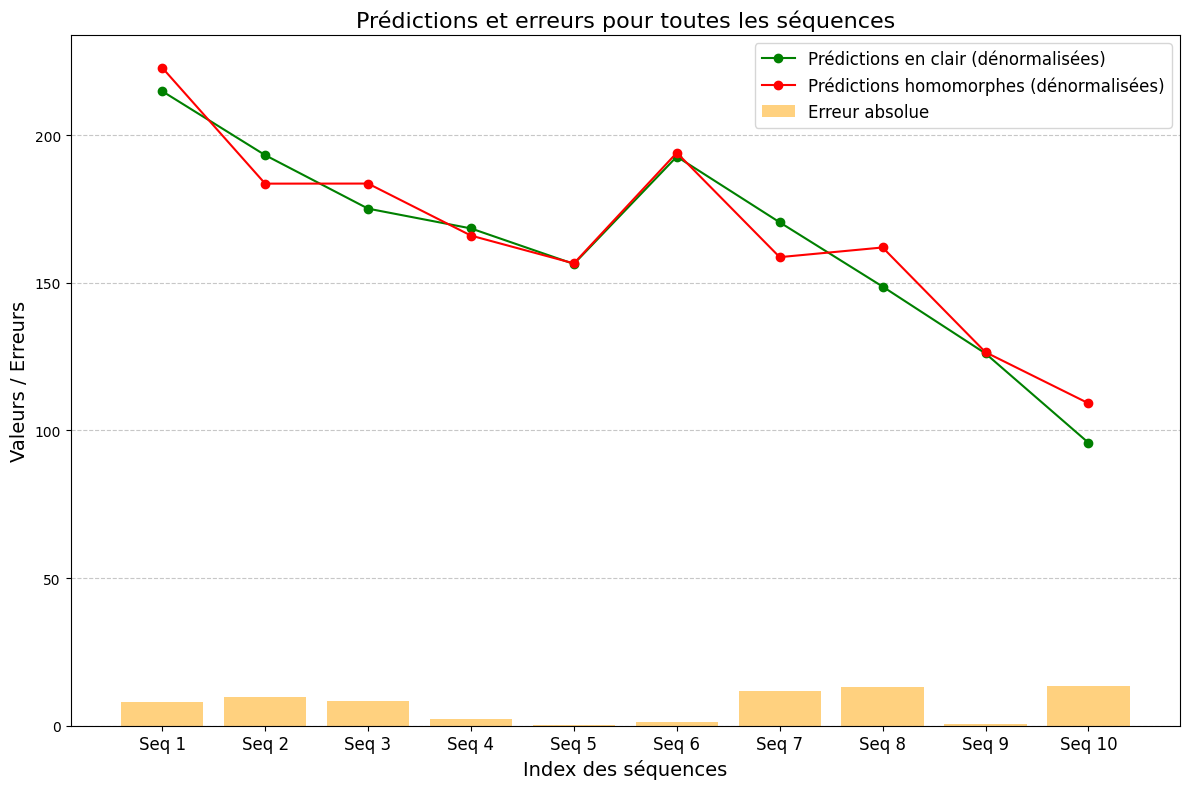

In [ ]:
test_precision_multiple_sequences_with_single_plot()
